In [2]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, levene

In [5]:
df_control = pd.read_csv(r'/home/omkar/Omkar Pawar/Data Science/Ineuron-FSDS-2.0/study/AB Testing/control_group.csv',sep=";")
df_control.head()


,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Control Campaign,2.08.2019,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0
2,Control Campaign,3.08.2019,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0
3,Control Campaign,4.08.2019,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0
4,Control Campaign,5.08.2019,1835,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df_control.columns=["Campaign Name", "Date", "Amount Spent", 
                        "Number of Impressions", "Reach", "Website Clicks", 
                        "Searches Received", "Content Viewed", "Added to Cart",
                        "Purchases"]

In [9]:
df_control.isnull().sum()

Campaign Name            0
Date                     0
Amount Spent             0
Number of Impressions    1
Reach                    1
Website Clicks           1
Searches Received        1
Content Viewed           1
Added to Cart            1
Purchases                1
dtype: int64

In [10]:
df_control['Number of Impressions']=df_control['Number of Impressions'].fillna(df_control['Number of Impressions'].mean())

In [11]:
df_control['Reach']=df_control['Reach'].fillna(df_control['Reach'].mean())
df_control['Website Clicks']=df_control['Website Clicks'].fillna(df_control['Reach'].mean())

df_control['Content Viewed'] =df_control['Content Viewed'].fillna(df_control['Content Viewed'].mean())
df_control['Added to Cart']=df_control['Added to Cart'].fillna(df_control['Content Viewed'].mean())
df_control['Purchases']=df_control['Purchases'].fillna(df_control['Purchases'].mean())


In [12]:
df_control['Searches Received']=df_control['Searches Received'].fillna(df_control['Searches Received'].mean())

In [13]:
df_control.isnull().sum()

Campaign Name            0
Date                     0
Amount Spent             0
Number of Impressions    0
Reach                    0
Website Clicks           0
Searches Received        0
Content Viewed           0
Added to Cart            0
Purchases                0
dtype: int64

In [15]:
df_control.shape

(30, 10)

In [19]:
df_control.describe()

,Amount Spent,Number of Impressions,Reach,Website Clicks,Searches Received,Content Viewed,Added to Cart,Purchases
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,2288.433333,109559.758621,88844.931034,8104.931034,2221.310345,1943.793103,1321.459770,522.793103
std,367.334451,21311.695472,21452.627592,15346.809822,851.025795,764.021907,417.268206,181.810508
min,1757.000000,71274.000000,42859.000000,2277.000000,1001.000000,848.000000,442.000000,222.000000
25%,1945.500000,95191.250000,75300.250000,4122.250000,1629.250000,1249.000000,942.500000,375.500000
50%,2299.500000,112368.000000,91418.000000,5329.500000,2340.000000,1979.500000,1389.000000,506.000000
75%,2532.000000,121259.000000,101958.750000,6789.250000,2655.000000,2360.500000,1681.500000,663.250000
max,3083.000000,145248.000000,127852.000000,88844.931034,4891.000000,4219.000000,1943.793103,800.000000


In [20]:
df_control.columns

Index(['Campaign Name', 'Date', 'Amount Spent', 'Number of Impressions',
       'Reach', 'Website Clicks', 'Searches Received', 'Content Viewed',
       'Added to Cart', 'Purchases'],
      dtype='object')

In [18]:


columns_to_test = ['Amount Spent', 'Number of Impressions', 'Reach', 'Website Clicks', 
                    'Searches Received', 'Content Viewed', 'Added to Cart', 'Purchases']

# check for normal distribution:

for column_name in columns_to_test:
    column_data = df_control[column_name]
    stat, p_value = shapiro(column_data)
    print(f"Shapiro-Wilk Test for {column_name} - p-value: {p_value}")
    
    alpha = 0.05
    if p_value < alpha:
        print(f"Reject the null hypothesis. The data in {column_name} is not normally distributed.")
    else:
        print(f"Fail to reject the null hypothesis. The data in {column_name} appears to be normally distributed.")
    print("----------------------------------------------------------")

Shapiro-Wilk Test for Amount Spent - p-value: 0.23127490282058716
Fail to reject the null hypothesis. The data in Amount Spent appears to be normally distributed.
----------------------------------------------------------
Shapiro-Wilk Test for Number of Impressions - p-value: 0.11452337354421616
Fail to reject the null hypothesis. The data in Number of Impressions appears to be normally distributed.
----------------------------------------------------------
Shapiro-Wilk Test for Reach - p-value: 0.6537985801696777
Fail to reject the null hypothesis. The data in Reach appears to be normally distributed.
----------------------------------------------------------
Shapiro-Wilk Test for Website Clicks - p-value: 4.1248282567352135e-11
Reject the null hypothesis. The data in Website Clicks is not normally distributed.
----------------------------------------------------------
Shapiro-Wilk Test for Searches Received - p-value: 0.04963720962405205
Reject the null hypothesis. The data in Search

In [15]:
df_test = pd.read_csv(r'C:\Users\SUSHANT\Desktop\AB testing/test_group.csv',sep=';')
df_test

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Test Campaign,1.08.2019,3008,39550,35820,3038,1946,1069,894,255
1,Test Campaign,2.08.2019,2542,100719,91236,4657,2359,1548,879,677
2,Test Campaign,3.08.2019,2365,70263,45198,7885,2572,2367,1268,578
3,Test Campaign,4.08.2019,2710,78451,25937,4216,2216,1437,566,340
4,Test Campaign,5.08.2019,2297,114295,95138,5863,2106,858,956,768
5,Test Campaign,6.08.2019,2458,42684,31489,7488,1854,1073,882,488
6,Test Campaign,7.08.2019,2838,53986,42148,4221,2733,2182,1301,890
7,Test Campaign,8.08.2019,2916,33669,20149,7184,2867,2194,1240,431
8,Test Campaign,9.08.2019,2652,45511,31598,8259,2899,2761,1200,845
9,Test Campaign,10.08.2019,2790,95054,79632,8125,2312,1804,424,275


In [16]:
df_test.isnull().sum()

Campaign Name          0
Date                   0
Spend [USD]            0
# of Impressions       0
Reach                  0
# of Website Clicks    0
# of Searches          0
# of View Content      0
# of Add to Cart       0
# of Purchase          0
dtype: int64

In [17]:
df_test.columns

Index(['Campaign Name', 'Date', 'Spend [USD]', '# of Impressions', 'Reach',
       '# of Website Clicks', '# of Searches', '# of View Content',
       '# of Add to Cart', '# of Purchase'],
      dtype='object')

In [18]:
df_test.shape

(30, 10)

In [19]:
df_test.describe()

,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,2563.066667,74584.800000,53491.566667,6032.333333,2418.966667,1858.000000,881.533333,521.233333
std,348.687681,32121.377422,28795.775752,1708.567263,388.742312,597.654669,347.584248,211.047745
min,1968.000000,22521.000000,10598.000000,3038.000000,1854.000000,858.000000,278.000000,238.000000
25%,2324.500000,47541.250000,31516.250000,4407.000000,2043.000000,1320.000000,582.500000,298.000000
50%,2584.000000,68853.500000,44219.500000,6242.500000,2395.500000,1881.000000,974.000000,500.000000
75%,2836.250000,99500.000000,78778.750000,7604.750000,2801.250000,2412.000000,1148.500000,701.000000
max,3112.000000,133771.000000,109834.000000,8264.000000,2978.000000,2801.000000,1391.000000,890.000000


In [20]:
df_test.columns=['Campaign Name','Date','Spend','Number of Impressions','Reach','Website Clicks','Search',
                 'Content Viewed','Added to cart','Purchases']


In [22]:
columns_to_test = ['Spend','Number of Impressions','Reach','Website Clicks','Search',
                 'Content Viewed','Added to cart','Purchases']

for column_name in columns_to_test:
    column_data = df_test[column_name]
    stat, p_value = shapiro(column_data)
    print(f"Shapiro-Wilk Test for {column_name} - p-value: {p_value}")
    
    alpha = 0.05
    if p_value < alpha:
        print(f"Reject the null hypothesis. The data in {column_name} is not normally distributed.")
    else:
        print(f"Fail to reject the null hypothesis. The data in {column_name} appears to be normally distributed.")
    print("----------------------------------------------------------")

Shapiro-Wilk Test for Spend - p-value: 0.11714765429496765
Fail to reject the null hypothesis. The data in Spend appears to be normally distributed.
----------------------------------------------------------
Shapiro-Wilk Test for Number of Impressions - p-value: 0.15366658568382263
Fail to reject the null hypothesis. The data in Number of Impressions appears to be normally distributed.
----------------------------------------------------------
Shapiro-Wilk Test for Reach - p-value: 0.05699513852596283
Fail to reject the null hypothesis. The data in Reach appears to be normally distributed.
----------------------------------------------------------
Shapiro-Wilk Test for Website Clicks - p-value: 0.011976935900747776
Reject the null hypothesis. The data in Website Clicks is not normally distributed.
----------------------------------------------------------
Shapiro-Wilk Test for Search - p-value: 0.006847961340099573
Reject the null hypothesis. The data in Search is not normally distribu

C:\Users\SUSHANT\AppData\Local\Temp\ipykernel_16640\3886913350.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_control['Number of Impressions'])


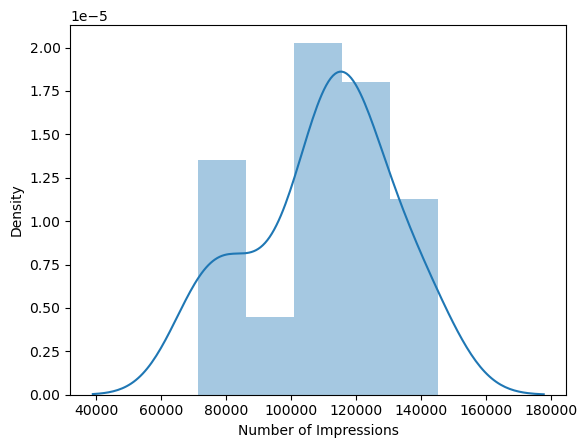

In [39]:
sns.distplot(df_control['Number of Impressions'])
plt.show()

C:\Users\SUSHANT\AppData\Local\Temp\ipykernel_16640\839361603.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_test['Number of Impressions'])


<Axes: xlabel='Number of Impressions', ylabel='Density'>

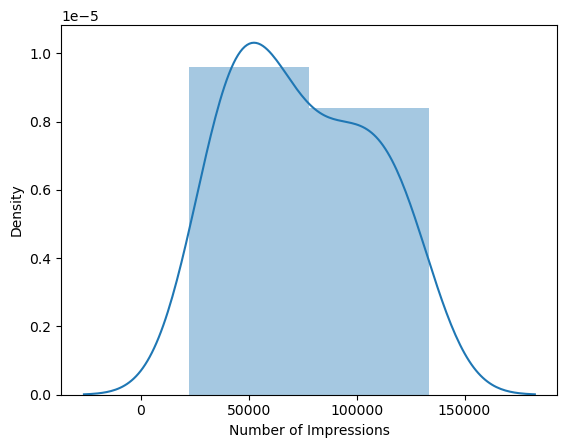

In [37]:
sns.distplot(df_test['Number of Impressions'])

In [ ]:
#   Ho: Mean number of impressions of control group >=   mean number of impressions of test group
#   H1 : Mean number of impressions of control group <  mean number of impressions of test group

In [40]:
# Perform a t-test for independent samples
t_statistic, p_value = stats.ttest_ind(df_control['Number of Impressions'],df_test['Number of Impressions'])

# Display the results
print("t-statistic:", t_statistic)
print("p-value:", p_value)

# Check if the difference is statistically significant at a 95% confidence level (common threshold)
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference.")

t-statistic: 4.969499291621205
p-value: 6.273710342737277e-06
Reject the null hypothesis. There is a significant difference.
